# Wichtig: 

in der Vorlesung besprochen!  

* Diese Aufgabe wird als Team Projekt bewertet. (max. 3 Teilnehmer) 
* Die hier erreichten Punkte gehen zu 20% in Klausur-Bewertung ein.

## Teilnehmer

* Geben Sie hier im Dokument die Namen der Teilnehmer an! 

Teilnehmer: 
* Anna-Lena Ehmer
* Elisa Michel
* Felix Weinmann

### Abgabe

* Die Abgabe erfolgt über Moodle

* Abzugeben ist ein jupyter Notebook mit
    * Text, der beschreibt was und wieso sie die einzelnen Analyse-Schritte durchführen 
    * Pythoncode, der die einzelnen Schritte durchführt
    * eine Zusammenfassung am Ende



* Sie können neue Zellen mit Hilfe der Jupyter-Icons hinzufügen
    * Sie können zwischen Markdown oder Code wählen 

* Export des Jupyter Notebooks
    * save as --> ipynb

* Das Jupyter Notebook zur Deadline in Moodle hochladen! 
    * der Name des JupyterNotebooks enthält auch die Namen der Teilnehmer

### Kriterien

* Sind die einzelnen Schritte gut dokumentiert und begründet? 

* Sind die bekannten in der Vorlesung vorgestellten Verfahren sinnvoll eingesetzt worden? 
    * Wurde begründet wieso ein Verfahren nicht weiter verfolgt wurde? 

* Wurde eine gute Klassifizierung erreicht? 


# Aufgabe zur Klassifizierung

Im Verzeichnis data-classification finden Sie Daten aus einem MicroCensus
* die Datei adult.data enthält Datenobjekte (zum Testen)
* die Datei adult.test enthält Datenobjekte (zum Testen)
* die Datei adult.names enthält Beschreibungen zu den Daten

## Aufgaben 

Entwickeln Sie ein Klassifizierungsmodell, dass so genau wie möglich vorhersagt, ob eine Person ein Einkommen von mehr als 50000 Doller pro Jahr hat! 
* Verwenden Sie was sie bisher gelernt haben! 
* Seien Sie kritisch! 


## Einlesen der Daten in eine Objekt-Liste

Zuerst müssen die Daten eingelesen werden. Hierfür wurden die schon getrennten Test und Trainingsdaten in verschiedene Variablen geladen. Es wurde ein Separator ergänzt, da sonst vor den Daten manchmal ein Leerzeichen ist.

In [1]:
import pandas as pd

df_train = pd.read_csv('./data-classification/adult.data', sep = ', ', header=None, engine='python', names=[
'age', 'workclass', 'fnlwgt', 
'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 
'sex' , 'capital-gain' , 'capital-loss',
'hours-per-week', 'native-country', "<50k"
])

df_test = pd.read_csv('./data-classification/adult.test', sep = ', ', header=None, engine='python', names=[
'age', 'workclass', 'fnlwgt', 
'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 
'sex' , 'capital-gain' , 'capital-loss',
'hours-per-week', 'native-country', "<50k"
])
print("Trainingsdaten: " + str(df_train.shape))
print("Testdaten: " + str(df_test.shape))

FileNotFoundError: [Errno 2] No such file or directory: './data-classification/adult.data'

Im Zusammenhang hiermit wurde die Datenmenge der einzelnen Datensätze bestimmt. Der Trainingsdatensatz verfügt über 32562 Zeilen, der Testdatensatz über 16283 Datensätze. Somit liegt etwa ein verhältnis von 66:33 vor.

## Vorverarbeitung der Daten

Zuerst müssen die Daten von Fehlern bereinigt werden. Danach können Werte entfernt werden. Schlussendlich muss die Darstellung der Merkmale verändert werden. All diese Schritte werden im folgenden Abschnitt beschrieben und schlussendlich umgesetzt. All dies wird als Funktion implementiert, da sie sowohl auf die Test- als auch die Trainingsdaten ausgeführt werden muss.

**1) Ungültige Datensätze entfernen**

Hierbei wurden in den Datensätzen "?" und "None" gefunden. Bei der Betrachtung der Datensätze war auffällig, dass die "?" nur in workclass, occupation und native-country vorkommen. Zudem sind "?" in workclass und occupation nahezu immer in der gleichen Zeile. Somit werden 2399 Zeilen in den Trainingsdaten und 1222 Zeilen in den Testdaten entfernt, wenn die Zeilen mit "?" und "None" ausgeschlossen werden. Dies ist angesichts der großen Zahl an Trainingsdaten akzeptabel. Die Alternative der Mittelwertsbildung ist z.B. bei Länderdaten nicht sinnvoll. 

**2) Formatierungsinkonsistenzen korrigieren**

Ebenfalls wird bei der Betrachtung der Daten ersichtlich, dass teilweise in der letzten Spalte "<50k" ein Schreibfehler in Form von ">50K." oder aber "<=50K." vorliegt. Dieser lässt sich durch eine Ersetzung mit dem richtigen Wert einfach beseitigen.

**3) Datentypen vereinheitlichen**

Die Daten in der Spalte "Age" liegen teilweise als String und teilweise als Integer vor. Dies muss vereinheitlicht werden. Da sich in diesem Fall Zahlwerte anbieten, werden alle Werte zu Integern konvertiert. 

**4) Doppelte oder ungenaue Daten entfernen**

Die Daten in der Spalte "Education" sind bereits als Dictionary in der Spalte "Education-Number" hinterlegt. Somit kann die Spalte "Education" entfernt werden. Dabei gelten folgende Verhältnisse:

In [ ]:
education_mapping = {'Preschool': 1,
                     '1st-4th': 2,
                     '5th-6th': 3,
                     '7th-8th': 4,
                     '9th': 5,
                     '10th': 6,
                     '11th': 7,
                     '12th': 8,
                     'HS-grad': 9,
                     'Some-college': 10,
                     'Assoc-voc': 11,
                     'Assoc-acdm': 12,                     
                     'Bachelors': 13,
                     'Masters': 14,
                     'Prof-school': 15,
                     'Doctorate': 16             
                    }

Die Spalte "fnlwgt" wird entfernt, da die Werte nach der Definition nicht einheitlich bestimmt wurden. Aufgrund dieser Inkonsistenzen sollten sie nicht als Grundlage dienen.

**5) Merkmalsspalten verändern**

Da die Lernalgorithmen mit Zahlen arbeiten, müssen die Daten verändert werden. Während die "Education-Number", das "Age" und die "capital-gain/loss" Werte bereits ordinal vorliegen, sind die restlichen Daten nominal gegeben. 

Hierbei lassen sich allerdings die Werte für "Sex", welche in der Tabelle nur mit "female" und "male" unterschieden werden in 0 und 1 aufteilen. Dabei wird "female" durch 1 und "male" durch 0 ersetzt.

Alle anderen Werte werden durch einen OneHotEncoder in dünn besetzte Matrizen verwandelt. Dabei erstellt der Encoder eine Liste aller möglichen Einträge einer Spalte und erzeugt aus dieser so viele neue Spalten, wie die Liste Einträge hat. Dabei wird für jede Spalte in der Zeile eine 1 eingetragen, die in der ursprünglichen Spalte den Namen der Spalte als Eintrag hatte. So sind alle Werte nur noch mit 1 und 0 darstellbar. Allerdings vergrößert sich die Anzahl der Spalten hierbei signifikant. 

Die Daten der letzten Spalte ("<50k") werden ebenfalls als 0 und 1 dargestellt. Dabei wird "<=50k" durch 1 und ">50k" durch 0 ersetzt.

Diese Schritte werden im folgenden Codestück zusammengefasst dargestellt:

In [ ]:
def prepareData(dataFrame):
    #1 Ungültige Datensätze entfernen
    dataFrame.replace(to_replace = '?', value = pd.NaT, inplace = True)
    dataFrame.replace(to_replace = 'None', value = pd.NaT, inplace = True)
    dataFrame.dropna(inplace = True)
    
    #2 Formatierungsinkonsistenzen korrigieren
    dataFrame.replace(to_replace = '<=50K.', value = '<=50K', inplace = True)
    dataFrame.replace(to_replace = '>50K.', value = '>50K', inplace = True)

    #3 Datentypen vereinheitlichen
    dataFrame['age'] = pd.to_numeric(dataFrame['age'], errors = 'coerce')
    
    #4 Doppelte oder ungenaue Daten entfernen
    if "education" in dataFrame.columns:
        dataFrame.drop(labels = ["education"], axis = 1, inplace = True)
    if "fnlwgt" in dataFrame.columns:
        dataFrame.drop(labels = ["fnlwgt"], axis = 1, inplace = True)     
    
    #5 Merkmalsspalten verändern
    dataFrame.replace(to_replace = '<=50K', value = 1, inplace = True)
    dataFrame.replace(to_replace = '>50K', value = 0, inplace = True)
    dataFrame.replace(to_replace = 'Male', value = 0, inplace = True)
    dataFrame.replace(to_replace = 'Female', value = 1, inplace = True)
    
    # OneHotEncoder
    return pd.get_dummies(dataFrame)

df_train_prepared = prepareData(df_train)
df_test_prepared = prepareData(df_test)
print("Trainingsdaten: " + str(df_train_prepared.shape))
print("Testdaten: " + str(df_test_prepared.shape))

Trainingsdaten: (30162, 87)
Testdaten: (15060, 86)


Die Spaltenanzahl für Trainings- und Testdaten ist unterschiedlich. Dabei fehlt eine Spalte bei den Testdaten. Dies ist damit zu begründen, dass die Testdaten eine Landesauswahl (Niederlande) nicht haben, welche allerdings für die Trainingsdaten gegeben war. Um dies auszugleichen, werden leere Spalten hinzugefügt und mit dem Titel versehen, welchen die zusätzliche Spalte trägt.

In [ ]:
diffColumns = [x for x in df_train_prepared.columns if x not in df_test_prepared.columns]

#hinzufuegen der Anzahl der Werte
for category in diffColumns:    
    df_test_prepared[category] = len(df_test_prepared) * [0]
    
df_test_prepared = df_test_prepared[df_train_prepared.columns]

Hierbei ist zu beachten, dass nur den Testdaten Merkmale aus den Trainingsdaten hinzugefügt werden und nicht anders herum. Selbst wenn die Testdaten eine Spalte mehr hätten, wäre diese irrelevant, da mit ihr nicht trainiert werden kann.

## Standardisierung

**1) Aufteilung in Ausgangsdaten und Zielwerte**

Zum Lernen der Daten müssen diese in Ausgangsdaten (x_train/x_test) und Zielwerte (y_train/y_test) unterteilt werden.

In [ ]:
#index von <50K
indexTest50K = df_test_prepared.columns.tolist().index('<50k')
indexTrain50K = df_train_prepared.columns.tolist().index('<50k')

#Aufteilen der Spalten der Testdaten
df_test2_prepared = df_test_prepared.copy()
df_test2_prepared.drop(labels=["<50k"], axis=1, inplace=True)

#Aufteilen der Spalten der Trainingsdaten
df_train2_prepared = df_train_prepared.copy()
df_train2_prepared.drop(labels=["<50k"], axis=1, inplace=True)

#Erstellen der Datensätze
x_test, y_test = df_test2_prepared.values, df_test_prepared.iloc[:, indexTest50K].values
x_train, y_train = df_train2_prepared.values, df_train_prepared.iloc[:, indexTrain50K].values

**2) Standardisieren der Daten**

Um möglichst gute Ergebnisse zu erzielen, sollten die Daten zudem standardisiert werden. Dabei werden die Werte auf eine Normalverteilung gebracht.

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

Somit sind die Daten vorbereitet. Allerdings sind nun 86 Kategorien gegeben, welche im folgenden Schritt reduziert und komprimiert werden.

## Merkmalsauswahl

**Auswahl der zu betrachtenden Merkmale**

Aus 86 Merkmalen eine binäre Klassifizierung zu erstellen, würde zu einer Überanpassung des Modells führen. Es soll daher im Folgenden überprüft werden, welchen Einfluss die einzelnen Merkamle auf das Gesamtergebnis haben. Daraus kann geschlussfolgert werden, welche Merkmale unbedeutend und somit entfernbar sind.

Dabei soll zuerst die Relevanz der einzelnen Merkmale mittels des RandomForest ermittelt werden, da dieser eine Gesamtübersicht für 86 Merkmale erstellen kann.

**1) RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(x_train, y_train)
importances = forest.feature_importances_

Die hierbei erhaltenen Daten werden nun als Graphik dargestellt. Dabei ist ersichtlich, dass nach den ersten 15 Merkmalen der Balken nicht mehr dargestellt wird. Die ersten 15 Werte werden als Liste ausgegeben. Aus dieser wird anschließend eine qualifizierte Auswahl getroffen.

In [ ]:
indices = np.argsort(importances)[::-1]

feat_labels = df_test2_prepared.columns[:]

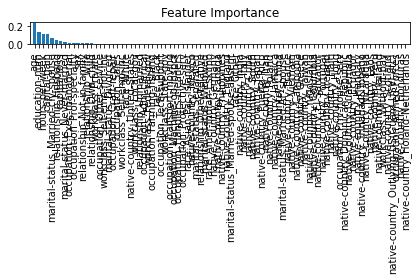

In [ ]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
for f in range(15):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) age                            0.228236
 2) education-num                  0.131853
 3) hours-per-week                 0.112356
 4) capital-gain                   0.108910
 5) marital-status_Married-civ-spouse 0.071833
 6) relationship_Husband           0.045703
 7) capital-loss                   0.036511
 8) marital-status_Never-married   0.023701
 9) occupation_Exec-managerial     0.020869
10) occupation_Prof-specialty      0.017094
11) sex                            0.015029
12) relationship_Not-in-family     0.011853
13) relationship_Wife              0.010505
14) relationship_Own-child         0.010272
15) workclass_Private              0.009880


Dabei fiel auf, dass innerhalb dieses Bereichs der Einfluss der Merkmale auf unter 1% fällt. Aus diesem Grund wurde entschieden, eine Grenze bei 1% zu setzen. Die 14 Elemente, deren Einfluss darüber liegt, werden nun in x_train_importent gespeichert. Dies wird mittels der Methode SelectFromModel() durchgeführt. 

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.010, prefit=True)

x_train_important = sfm.transform(x_train)
x_train_istd = stdsc.fit_transform(x_train_important)

idx_IN_columns = [indices[x] for x in range(x_train_important.shape[1])]
x_test_important = x_test[:, idx_IN_columns]
x_test_istd = stdsc.transform(x_test_important)

**2) SBS**

Um zu zeigen, dass sich aus diesen 14 Elementen eine genaue Vorhersage treffen lässt, soll der SBS-Algorithmus durchgeführt werden. Dessen Resultat wird nach dem folgenden Codeabschnitt als Graphik dargestellt.

Anhand dieser Graphik wird zudem deutlich, welche der verbleibenden 14 Werte nach Aussage des SBS-Algorithmus ausschlaggebend für das Gesamtergebnis sind.

In [ ]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = self.test_size, random_state = self.random_state)
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, x_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(x_train, y_train, x_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, x):
        return x[:, self.indices_]

    def _calc_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn, k_features = 1)
sbs.fit(x_train_istd, y_train)

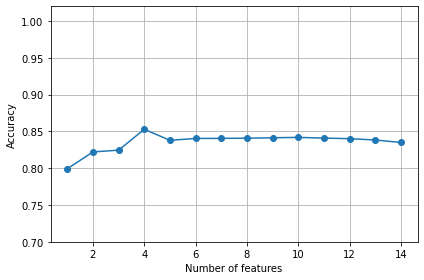

In [ ]:
# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

Anhand dieser Graphik zeigt sich, dass SBS/KNN mit 4 Merkmalen die besten Ergebnisse erzielt. Dies wurde anhand der Trainings- und Testdaten überprüft. Hierfür wird die Trainigsgenauigkeit mit allen (86), den 14 zuvor gewählten und den vier scheinbar besten Merkmalen berechnet. 
Ebenso wird für alle diese Fälle die Testgenauigkeit berechnet.

In [ ]:
elements = list(sbs.subsets_[10])

# Genauigkeit für alle Merkmale (86)
knn.fit(x_train_std, y_train)
print('Trainingsgenauigkeit für alle Merkmale: ', knn.score(x_train_std, y_train))
print('Testgenauigkeit für alle Merkmale: ', knn.score(x_test_std, y_test))

#Genauigkeit für 15 Merkmale
knn.fit(x_train_istd, y_train)
print('Trainingsgenauigkeit für 14 Merkmale: ', knn.score(x_train_istd, y_train))
print('Testgenauigkeit für 14 Merkmale: ', knn.score(x_test_istd, y_test))

#Genauigkeit für 4 Merkmale
print('Vier auswählgewählte Merkmale: ', df_test2_prepared.columns[1:][elements])
knn.fit(x_train_istd[:, elements], y_train)
print('Trainingsgenauigkeit für 4 Merkmale: ', knn.score(x_train_istd[:, elements], y_train))
print('Testgenauigkeit für 4 Merkmale: ', knn.score(x_test_istd[:, elements], y_test))

Trainingsgenauigkeit für alle Merkmale:  0.874676745573901
Testgenauigkeit für alle Merkmale:  0.8194555112881806
Trainingsgenauigkeit für 14 Merkmale:  0.8700351435581195
Testgenauigkeit für 14 Merkmale:  0.7530544488711819
Vier auswählgewählte Merkmale:  Index(['sex', 'capital-loss', 'hours-per-week', 'workclass_Local-gov'], dtype='object')
Trainingsgenauigkeit für 4 Merkmale:  0.8234865061998541
Testgenauigkeit für 4 Merkmale:  0.8061752988047809


Anhand dieser Werte zeigt sich, dass sich die Trainingsgenauigkeit von allen zu 14 Merkmalen kaum verschlechtert. Dabei tritt eine deutliche Verschlechterung der Testgenauigkeit ein. Von 14 zu 4 Merkmalen sinkt die Trainingsgenauigkeit, dafür wird die Testgenauigkeit besser. Da das Modell anhand von Trainingsdaten erstellt werden soll, wird vorerst bei 14 Merkmalen verblieben.

## Datenkomprimierung

Um die Datenmenge noch weiter zu verringern, sollen nun Datenkomprimierungalgorithmen angewendet werden. Dabei sind drei Algorithmen bekannt: PCA, LDA und Kernel PCA.

**PCA**

PCA dient eigentlich zum unüberwachten Lernen. Dabei wird der Merkmalsraum linear transformiert und somit verändert. Merkmale werden nicht entfernt, sondern in Abhängigkeiten zueinander dargestellt. Hierfür wird zuerst eine Darstellung mit 2 verbleibenden Komponenten berechnet und visualisiert. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1],
                    alpha = 0.6, 
                    c = colors[idx],
                    edgecolor = 'black',
                    marker = markers[idx], 
                    label = cl)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_std)
X_test_pca = pca.transform(x_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

Das hierbei erstellte Ergebnis wird nun durch zwei Graphiken dargestellt. Die Erste stellt die Trainingsdaten und die Zweite die Testdaten dar.

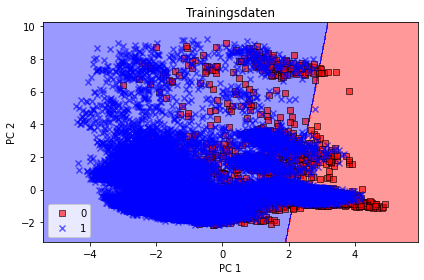

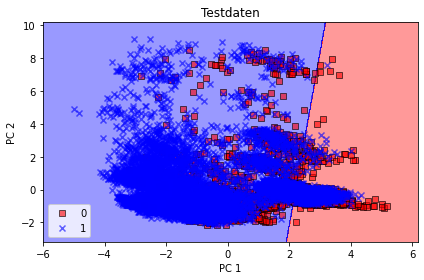

In [ ]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.title("Trainingsdaten")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

X_test_pca = pca.transform(x_test_std)

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.title("Testdaten")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Anhand der Verteilungen in den Graphiken ist schon ersichtlich, dass eine Trennung der Daten problematisch werden könnte. Um dies zu bestätigen, wird die Testgenauigkeiten für alle möglichen Aufteilungen (2 bis 14) berechnet werden. Dies wird im nächsten Codeabschnitt berechnet.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

for i in range(2,x_train_important.shape[1]):
    pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=i),
                        LogisticRegression(random_state=1, solver='lbfgs'))
    pipe_lr.fit(x_train_important, y_train)
    print('PCA Testgenauigkeit: %.3f, Komponenten: ' % pipe_lr.score(x_test_important, y_test), i)

PCA Testgenauigkeit: 0.755, Komponenten:  2
PCA Testgenauigkeit: 0.755, Komponenten:  3
PCA Testgenauigkeit: 0.755, Komponenten:  4
PCA Testgenauigkeit: 0.755, Komponenten:  5
PCA Testgenauigkeit: 0.755, Komponenten:  6
PCA Testgenauigkeit: 0.760, Komponenten:  7
PCA Testgenauigkeit: 0.761, Komponenten:  8
PCA Testgenauigkeit: 0.757, Komponenten:  9
PCA Testgenauigkeit: 0.756, Komponenten:  10
PCA Testgenauigkeit: 0.755, Komponenten:  11
PCA Testgenauigkeit: 0.755, Komponenten:  12
PCA Testgenauigkeit: 0.755, Komponenten:  13


Hierbei bestätigt sich die zuvor getroffene Vermutung. Im Vergleich zum vorherigen Schritt gibt es einen starken Verlust an Genauigkeit, weshalb PCA nicht für die Komprimierung der Daten verwendet wird.

**LDA**

LDA dient zum überwachten Lernen. Dabei wird ein Merkmalsunterraum gesucht, welcher die Trennbarkeit der Klassen optimiert.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train_istd,y_train)

lr = LogisticRegression()
lr = lr.fit(x_train_lda, y_train)
print('LDA Testgenauigkeit: %.3f, Komponenten: 1' % lr.score(x_train_lda, y_train))

LDA Testgenauigkeit: 0.831, Komponenten: 1


Auch hier zeigt sich wieder, dass die Trainingsgenauigkeit geringer wird. Somit bringt die Anwendung von LDA auch keinen Vorteil für diesen Anwendungsfall.

**Kernel-PCA**

Das dritte Kompressionsverfahren ist Kernel-PCA. Dieses wird verwendet, wenn die Daten nicht linear trennbar sind. Wie sich durch PCA gezeigt hat, ist dies bei dem gegeben Datensatz der Fall. Allerdings ist die hierfür notwendige Berechnung sehr aufwendig. Deshalb wird zuerst nur mit wenigen Daten getestet, um zu überprüfen, ob eine Verbesserung möglich wäre.

In [ ]:
from sklearn.decomposition import KernelPCA

x_train_kpca = x_train_istd[:5000]
y_train_kpca = y_train[:5000]

pipe_lr = make_pipeline(StandardScaler(),KernelPCA(kernel='rbf', gamma=15, n_components=8, n_jobs=-1), LogisticRegression(random_state=1))
pipe_lr.fit(x_train_kpca, y_train_kpca)
print('Kernel-PCA Testgenauigkeit: %.3f' % pipe_lr.score(x_test_istd, y_test))

Kernel-PCA Testgenauigkeit: 0.754


Dabei zeigt sich, dass Kernel-PCA keinen wirklichen Fortschritt bringt. Deshalb wird auch dies nicht weiter verfolgt.

**Ergebnis:**

Es wird kein Datenkomprimierungsalgorithmus verwendet, da diese bei dem gegebenen Datensatz keinen Vorteil bieten. Somit wird mit den 14 zuvor gewählten Merkmalen weiterhin gearbeitet.

## Lernverfahren

Im Folgenden werden die verschiedenen Lernverfahren dargestellt, um zu überprüfen, welches das beste Ergebnis liefert. Dafür werden zuerst alle Verfahren erstellt und anschließend die Genauigkeit der Trainings- als auch der Testdaten dargestellt. Dabei wurden die verschiedenen Argumente so gewählt, dass ein mögliches Überanpassen verhindert wird. So wird etwa der RandomForrest mit einer maximalen Tiefe von 4 ausgeführt.

In [ ]:
#alle imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#erstellen aller Pipelines
pipe_lr = make_pipeline(LogisticRegression(C = 100.0, random_state = 1))
pipe_pe = make_pipeline(Perceptron(max_iter = 40, eta0 =0.1, random_state = 2))
pipe_svcL = make_pipeline(SVC(kernel='linear', C = 1.0, random_state = 1))
pipe_svcR = make_pipeline(SVC(kernel='rbf', random_state = 1, gamma = 0.10, C = 10.0))
pipe_dtc = make_pipeline(DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1))
pipe_rfc = make_pipeline(RandomForestClassifier(criterion = 'gini', max_depth = 4, n_estimators = 12, random_state = 1, n_jobs=-1))
pipe_knn = make_pipeline(KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'minkowski'))

Zudem wird eine Funktion printPrecision erstellt, welche seperat ausgibt, zu welchem Anteil das Gehalt der Personen korrekt klassifiziert wurde.

In [ ]:
def printPrecision(pipe, dataType, x, y):
        pred_x = pipe.predict(x)
        print(dataType + ": Correctly detected <=50k: %.3f" % (np.sum(pred_x[y == 1] == 1) / np.sum(y == 1)))
        print(dataType + ": Correctly detected  >50k: %.3f" % (np.sum(pred_x[y == 0] == 0) / np.sum(y == 0)))


Nun wird eine Funktion erstellt, welche die Trainings- und Testgenauigkeit für die verschiedenen Algorithmen berechnet. In dieser wird printPrecision aufgerufen.

In [ ]:
def testMlAlgo(pipe, name, x_train, y_train, x_test, y_test):
    print(name)
    pipe.fit(x_train, y_train)
    print('Trainingsgenauigkeit: %.3f' % pipe.score(x_train, y_train))
    print('Testgenauigkeit: %.3f' % pipe.score(x_test, y_test))
    printPrecision(pipe, "Training", x_train, y_train)
    printPrecision(pipe, "Test", x_test, y_test)
    print()

testMlAlgo(pipe_lr, 'LogisticRegression', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_pe, 'Perception', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_svcL, 'SVC-linear', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_svcR, 'SVC-rbf', x_train_istd, y_train, x_test_istd, y_test) 
testMlAlgo(pipe_dtc, 'DecisionTreeClassifier', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_rfc, 'RandomForestClassifier', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_knn, 'KNN', x_train_istd, y_train, x_test_istd, y_test)  

LogisticRegression
Trainingsgenauigkeit: 0.842
Testgenauigkeit: 0.755
Training: Correctly detected <=50k: 0.929
Training: Correctly detected  >50k: 0.581
Test: Correctly detected <=50k: 0.969
Test: Correctly detected  >50k: 0.098

Perception
Trainingsgenauigkeit: 0.752
Testgenauigkeit: 0.755
Training: Correctly detected <=50k: 0.722
Training: Correctly detected  >50k: 0.841
Test: Correctly detected <=50k: 0.969
Test: Correctly detected  >50k: 0.099

SVC-linear
Trainingsgenauigkeit: 0.841
Testgenauigkeit: 0.758
Training: Correctly detected <=50k: 0.936
Training: Correctly detected  >50k: 0.554
Test: Correctly detected <=50k: 0.969
Test: Correctly detected  >50k: 0.111

SVC-rbf
Trainingsgenauigkeit: 0.856
Testgenauigkeit: 0.246
Training: Correctly detected <=50k: 0.944
Training: Correctly detected  >50k: 0.592
Test: Correctly detected <=50k: 0.001
Test: Correctly detected  >50k: 1.000

DecisionTreeClassifier
Trainingsgenauigkeit: 0.840
Testgenauigkeit: 0.803
Training: Correctly detected 

**Auswertung**

Bei den durchlaufenen Testfällen zeigt sich, dass der RandomForestClassifier das beste Ergebnis bei den Trainingsdaten liefert. Dabei liegt die Trainingsgenauigkeit bei 92,9% und die Testgenauigkeit bei 79,1%. Die beste Testgenauigkeit liefert der DecisionTreeClassifier mit 80,3% , hier liegt die Trainingsgenauigkeit bei 84%.

Der Unterschied der Werte lässt darauf vermuten, dass eine Überanpassung vorliegen könnte. Deshalb wird der gleiche Test nochmal mit weniger Merkmalen durchgeführt. Hierfür werden die 4 Merkmale verwendet, welche die SBS-Analyse als am wichtigsten betrachtet hat.

Die Zusatzinformationen zeigen, dass das Problem meist in der Erkennung der >50K-Fälle liegt.

In [ ]:
k3 = list(sbs.subsets_[10])
x_train_short = x_train_istd[:, k3]
x_test_short = x_test_istd[:, k3]

testMlAlgo(pipe_lr, 'LogisticRegression', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_pe, 'Perception', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_svcL, 'SVC-linear', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_svcR, 'SVC-rbf', x_train_short, y_train, x_test_short, y_test) 
testMlAlgo(pipe_dtc, 'DecisionTreeClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_rfc, 'RandomForestClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_knn, 'KNN', x_train_short, y_train, x_test_short, y_test)  

LogisticRegression
Trainingsgenauigkeit: 0.836
Testgenauigkeit: 0.787
Training: Correctly detected <=50k: 0.921
Training: Correctly detected  >50k: 0.577
Test: Correctly detected <=50k: 0.968
Test: Correctly detected  >50k: 0.231

Perception
Trainingsgenauigkeit: 0.757
Testgenauigkeit: 0.786
Training: Correctly detected <=50k: 0.904
Training: Correctly detected  >50k: 0.313
Test: Correctly detected <=50k: 0.960
Test: Correctly detected  >50k: 0.252

SVC-linear
Trainingsgenauigkeit: 0.839
Testgenauigkeit: 0.788
Training: Correctly detected <=50k: 0.933
Training: Correctly detected  >50k: 0.556
Test: Correctly detected <=50k: 0.966
Test: Correctly detected  >50k: 0.244

SVC-rbf
Trainingsgenauigkeit: 0.842
Testgenauigkeit: 0.790
Training: Correctly detected <=50k: 0.935
Training: Correctly detected  >50k: 0.561
Test: Correctly detected <=50k: 0.968
Test: Correctly detected  >50k: 0.244

DecisionTreeClassifier
Trainingsgenauigkeit: 0.840
Testgenauigkeit: 0.795
Training: Correctly detected 

Hierbei zeigt sich, dass sich die Trainingsgenauigkeit nicht wirklich verändert bzw. leicht verschlechtert hat. Beim RandomForestAlgorithmus ist sie schlechter geworden. Die Testgenauigkeit steigt im Durchschnitt an, der Wert von 80% wird knapp erreicht. Zu bemerken ist ebenfalls, dass sich der Prozentwert der korrekt erkannten >50K-Fälle teils verdreifacht hat. Dies stellt einen wichtigen Fortschritt zur Verringerung der Überanpassung dar. Die <=50K-Fälle werden nach wie vor sehr zuverlässig erkannt.

Ein anderes Problem stellt hierbei die Verteilung der Trainingsdaten dar. Es liegen deutlich mehr Trainingsdaten für <=50K vor als für >50K. Dies wird auch in der folgenden Graphik veranschaulicht. Dies ließe sich möglicherweise so verbessern, dass die Algorithmen eine Straffunktion anwenden, welche für die seltener vorkommenden Werte stärker agiert. Dies lässt sich mit class_weight='balanced' als Parameter erreichen. 

In [ ]:
print("Trainingsdaten mit >50K :" + str(np.sum(y_train==0)))
print("Trainingsdaten mit <=50K :" + str(np.sum(y_train==1)))

print("Testdaten mit >50K :" + str(np.sum(y_test==0)))
print("Testdaten mit <=50K :" + str(np.sum(y_test==1)))

Trainingsdaten mit >50K :7508
Trainingsdaten mit <=50K :22654
Testdaten mit >50K :3700
Testdaten mit <=50K :11360


In [ ]:
pipe2_lr = make_pipeline(LogisticRegression(C = 100.0, random_state = 1, class_weight='balanced'))
pipe2_pe = make_pipeline(Perceptron(max_iter = 40, eta0 =0.1, random_state = 2, class_weight='balanced' ))
pipe2_svcL = make_pipeline(SVC(kernel='linear', C = 1.0, random_state = 1, class_weight='balanced' ))
pipe2_svcR = make_pipeline(SVC(kernel='rbf', random_state = 1, gamma = 0.10, C = 10.0, class_weight='balanced'))
pipe2_dtc = make_pipeline(DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1, class_weight='balanced'))
pipe2_rfc = make_pipeline(RandomForestClassifier(criterion = 'gini', max_depth = 4, n_estimators = 12, random_state = 1, n_jobs=-1, class_weight='balanced'))
pipe2_knn = make_pipeline(KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'minkowski'))

testMlAlgo(pipe2_lr, 'LogisticRegression', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_pe, 'Perception', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_svcL, 'SVC-linear', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_svcR, 'SVC-rbf', x_train_short, y_train, x_test_short, y_test) 
testMlAlgo(pipe2_dtc, 'DecisionTreeClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_rfc, 'RandomForestClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_knn, 'KNN', x_train_short, y_train, x_test_short, y_test)  

LogisticRegression
Trainingsgenauigkeit: 0.753
Testgenauigkeit: 0.792
Training: Correctly detected <=50k: 0.708
Training: Correctly detected  >50k: 0.887
Test: Correctly detected <=50k: 0.958
Test: Correctly detected  >50k: 0.282

Perception
Trainingsgenauigkeit: 0.741
Testgenauigkeit: 0.791
Training: Correctly detected <=50k: 0.691
Training: Correctly detected  >50k: 0.892
Test: Correctly detected <=50k: 0.954
Test: Correctly detected  >50k: 0.290

SVC-linear
Trainingsgenauigkeit: 0.716
Testgenauigkeit: 0.794
Training: Correctly detected <=50k: 0.659
Training: Correctly detected  >50k: 0.891
Test: Correctly detected <=50k: 0.965
Test: Correctly detected  >50k: 0.270

SVC-rbf
Trainingsgenauigkeit: 0.754
Testgenauigkeit: 0.800
Training: Correctly detected <=50k: 0.708
Training: Correctly detected  >50k: 0.892
Test: Correctly detected <=50k: 0.958
Test: Correctly detected  >50k: 0.314

DecisionTreeClassifier
Trainingsgenauigkeit: 0.757
Testgenauigkeit: 0.803
Training: Correctly detected 

Hierbei zeigt sich, dass sich durch das Einsetzen des neuen Parameters die Ausgewogenheit zwischen den beiden Testgenauigkeiten von <=50K und >50K verbessert. Die Trainingsgenauigkeit wird geringer, dafür liegt die Testgenauigkeit bei nahezu allen Algorithmen bei 80%. Dabei werden nahezu (>90%) alle <=50K Daten korrekt erkannt. Die >50K Daten werden schlechter erkannt. Vom Modell als >50K klassifizierte Personen erfüllen dieses Kriterium mit einer hohen Wahrscheinlichekeit.